<a href="https://colab.research.google.com/github/leorehem/Stock-IA-app/blob/main/Aula_05_FUNDAMENTOS_DE_DATA_SCIENCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AVALIAÇÃO DE DESDOBRAMENTOS AMBIENTAIS POSITIVOS DE ALTERAÇÕES DA DINÂMICA POPULACIONAL DE ESPÉCIES EM COMPETIÇÃO EM AMBIENTES RADIOATIVOS SIMULADOS**

**Sérgio Assunção Monteiro, DSc**

*   linkedin: https://www.linkedin.com/in/sergio-assun%C3%A7%C3%A3o-monteiro-b781897b/

*   lattes: http://lattes.cnpq.br/9489191035734025

*   github: https://github.com/sergiomonteiro76

# **Dados Do Trabalho**

## **5: Histograma**

## 📜 Histograma: Distribuição do Tempo na Página

O histograma é um gráfico de barras que mostra a frequência com que determinados valores ocorrem em um conjunto de dados. Em marketing, podemos usá-lo para entender a distribuição do **tempo que os usuários passam em uma página (Time on Page)**. Isso ajuda a identificar se a maioria dos usuários sai rapidamente ou se engaja com o conteúdo por mais tempo.

* **Parâmetro Principal:** `nbins` (número de barras/faixas). A escolha do número de barras pode alterar a interpretação visual do gráfico.

In [ ]:
# Simulação de dados de "Tempo na Página" em segundos
np.random.seed(33)
tempo_na_pagina = np.random.exponential(scale=120, size=500) # Média de 120 segundos

# Histograma interativo com Plotly
fig = px.histogram(x=tempo_na_pagina, nbins=40,
                   title='Distribuição do Tempo Gasto na Página',
                   labels={'x': 'Tempo na Página (segundos)', 'y': 'Número de Usuários'},
                   template='plotly_dark',
                   opacity=0.8)

fig.update_layout(title_x=0.5, bargap=0.1)
fig.show()

### **6: Exercício 2**

### ✏️ Exercício 2
Simule os dados de **duração da sessão (em minutos)** de 300 usuários em um e-commerce. Suponha que a maioria das sessões seja curta. Use a distribuição Exponencial com uma média de 5 minutos (`scale=5`). Crie um histograma para visualizar esses dados.

## **7: Distribuições de Probabilidade**

## 🎲 Distribuições de Probabilidade em Marketing

Modelar o comportamento do cliente é crucial. Diferentes distribuições nos ajudam a entender diferentes fenômenos.

* **Distribuição Normal:** Ótima para modelar métricas como o **tempo médio na página**.
    * **Parâmetros:** Média ($\mu$) e Desvio Padrão ($\sigma$).
* **Distribuição de Poisson:** Usada para modelar o número de eventos que ocorrem em um intervalo fixo, como o **número de conversões por dia**.
    * **Parâmetro:** Lambda ($\lambda$), a taxa média de ocorrência.
* **Distribuição Exponencial Negativa:** Modela o tempo até o próximo evento ocorrer, como o **tempo até o próximo clique em um anúncio**.
    * **Parâmetro:** Lambda ($\lambda$), a taxa de ocorrência do evento.
* **Distribuição de Weibull:** Flexível, pode modelar a **taxa de cancelamento (churn)** ao longo do tempo.
    * **Parâmetros:** `k` (shape - forma) e `λ` (scale - escala). Se `k < 1`, a taxa de falha diminui com o tempo. Se `k > 1`, a taxa de falha aumenta.
* **Distribuição Gamma:** Usada para modelar o tempo de espera para múltiplos eventos, como o **tempo até um cliente fazer a terceira compra**.
    * **Parâmetros:** `a` (shape - forma) e `scale` (escala).

## **8: Visualização das Distribuições**

In [ ]:
# Gerando dados para as distribuições
x_norm = np.linspace(-5, 5, 200)
y_norm = stats.norm.pdf(x_norm, loc=0, scale=1) # Média 0, Desvio Padrão 1

x_poisson = np.arange(0, 20)
y_poisson = stats.poisson.pmf(x_poisson, mu=5) # Média de 5 conversões/dia

x_exp = np.linspace(0, 5, 200)
y_exp = stats.expon.pdf(x_exp, scale=1/1.5) # Lambda = 1.5

x_weibull = np.linspace(0, 3, 200)
y_weibull = stats.weibull_min.pdf(x_weibull, c=2.5, scale=1) # k=2.5

x_gamma = np.linspace(0, 20, 200)
y_gamma = stats.gamma.pdf(x_gamma, a=5, scale=1) # a=5

# Criando os gráficos com Plotly
fig = go.Figure()
fig.add_trace(go.Scatter(x=x_norm, y=y_norm, mode='lines', name='Normal (μ=0, σ=1)'))
fig.add_trace(go.Bar(x=x_poisson, y=y_poisson, name='Poisson (λ=5)'))
fig.add_trace(go.Scatter(x=x_exp, y=y_exp, mode='lines', name='Exponencial (λ=1.5)'))
fig.add_trace(go.Scatter(x=x_weibull, y=y_weibull, mode='lines', name='Weibull (k=2.5)'))
fig.add_trace(go.Scatter(x=x_gamma, y=y_gamma, mode='lines', name='Gamma (a=5)'))

fig.update_layout(title='Distribuições de Probabilidade em Marketing',
                  xaxis_title='Valor', yaxis_title='Probabilidade / Densidade',
                  template='plotly_dark', title_x=0.5)
fig.show()

### **9: Exercício 3**

### ✏️ Exercício 3

Uma campanha de marketing recebe, em média, **10 leads por hora**. Qual distribuição modela esse cenário? Gere e plote a distribuição de probabilidade para o número de leads em uma hora, variando de 0 a 30.

## **10: Diagrama de Dispersão, Covariância e Correlação**

## 🔗 Relações entre Variáveis: Covariância, Correlação e Dispersão

Essas ferramentas nos ajudam a entender como duas variáveis se movem juntas. Por exemplo: será que **aumentar o investimento em anúncios no Instagram** leva a **mais visitas no site**?

* **Diagrama de Dispersão (Scatter Plot):** A visualização ideal para inspecionar a relação entre duas variáveis quantitativas.
* **Covariância:** Mede a direção da relação linear entre duas variáveis. Um valor positivo indica que ambas se movem na mesma direção. Um valor negativo, em direções opostas. O valor absoluto é difícil de interpretar.
* **Correlação (Coeficiente de Pearson - r):** Mede tanto a **força** quanto a **direção** da relação linear.
    * **Parâmetros:** O valor de `r` varia de -1 a +1.
        * `r = 1`: Correlação linear positiva perfeita.
        * `r = -1`: Correlação linear negativa perfeita.
        * `r = 0`: Nenhuma correlação linear.
        * Valores próximos de 1 ou -1 (ex: 0.8 ou -0.8) indicam uma correlação forte.

In [ ]:
# Dados simulados: Investimento em anúncios vs. Visitas no site
np.random.seed(50)
investimento_ads = np.linspace(50, 1000, 100)
visitas_site = 250 + 5.5 * investimento_ads + np.random.normal(0, 1000, 100)
visitas_site = np.maximum(visitas_site, 0) # Garante que não há visitas negativas

# Cálculo da Covariância e Correlação
covariancia = np.cov(investimento_ads, visitas_site)[0, 1]
correlacao = np.corrcoef(investimento_ads, visitas_site)[0, 1]

print(f"Covariância entre Investimento e Visitas: {covariancia:.2f}")
print(f"Correlação entre Investimento e Visitas: {correlacao:.2f}")

# Diagrama de Dispersão com Plotly
fig = px.scatter(x=investimento_ads, y=visitas_site,
                 title='Relação entre Investimento em Anúncios e Visitas no Site',
                 labels={'x': 'Investimento em Anúncios (R$)', 'y': 'Visitas no Site'},
                 template='plotly_dark',
                 trendline='ols', # Adiciona uma linha de tendência para visualizar a relação
                 trendline_color_override='yellow')
fig.update_layout(title_x=0.5)
fig.show()

Covariância entre Investimento e Visitas: 394283.96
Correlação entre Investimento e Visitas: 0.80


### **11: Exercício 4**

### ✏️ Exercício 4
Simule dois conjuntos de dados: "Custo por Clique (CPC)" e "Taxa de Conversão". Suponha que, em geral, quando o CPC é mais alto, a taxa de conversão tende a ser ligeiramente menor (correlação negativa fraca). Calcule a correlação e visualize a relação com um diagrama de dispersão.

## **12: Curtose**

In [ ]:
# Simulação de dados de CLV (Customer Lifetime Value)
np.random.seed(99)
# Distribuição com cauda pesada (leptocúrtica)
clv_data = stats.t.rvs(df=3, loc=300, scale=100, size=1000)
clv_data = clv_data[clv_data > 0] # Filtra apenas valores positivos

# Cálculo da Curtose
curtose_valor = stats.kurtosis(clv_data, fisher=True) # fisher=True compara com a normal (k=0)

print(f"Curtose da distribuição de CLV: {curtose_valor:.2f}")
if curtose_valor > 0:
    print("Interpretação: A distribuição é Leptocúrtica (caudas pesadas), indicando presença de outliers (clientes de altíssimo valor).")
elif curtose_valor < 0:
    print("Interpretação: A distribuição é Platicúrtica (caudas leves).")
else:
    print("Interpretação: A distribuição é Mesocúrtica (semelhante à Normal).")


# Histograma para visualizar a distribuição e a curtose
fig = px.histogram(x=clv_data, nbins=50,
                   title=f'Distribuição do CLV (Curtose: {curtose_valor:.2f})',
                   labels={'x': 'Customer Lifetime Value (R$)', 'y': 'Frequência'},
                   template='plotly_dark')
fig.update_layout(title_x=0.5)
fig.show()

Curtose da distribuição de CLV: 8.63
Interpretação: A distribuição é Leptocúrtica (caudas pesadas), indicando presença de outliers (clientes de altíssimo valor).


### **13: Exercício 5**

### ✏️ Exercício 5
Gere 500 dados para **avaliações de um produto** (notas de 1 a 5). Crie uma distribuição onde a maioria das notas seja 4 e 5, mas com algumas notas 1. Calcule e interprete a curtose dessa distribuição. O que ela diz sobre a presença de avaliações extremas (muito baixas)?

## **14: Curtose**

## 🏔️ Curtose: A Forma dos Picos e Caudas

A curtose mede o "achatamento" ou o "apicuamento" de uma distribuição de probabilidade. Ela nos ajuda a entender a presença de **outliers** ou valores extremos.

* **Contexto de Marketing:** Podemos analisar a curtose da distribuição do **Valor do Ciclo de Vida do Cliente (Customer Lifetime Value - CLV)**. Uma curtose alta pode indicar que a maioria dos clientes tem um CLV baixo, mas existe um pequeno grupo de clientes extremamente valiosos (uma cauda longa e pesada).

* **Parâmetros de Interpretação (em relação à Curva Normal):**
    * **Leptocúrtica (Curtose > 0):** Pico mais alto e caudas mais pesadas. Mais propensa a outliers.
    * **Mesocúrtica (Curtose = 0):** Forma da distribuição Normal.
    * **Platicúrtica (Curtose < 0):** Pico mais baixo e caudas mais leves. Menos propensa a outliers.

## **15: Regressão Linear**

## 📈 Regressão Linear: Investimento vs. Vendas

A Regressão Linear nos ajuda a entender a relação entre duas ou mais variáveis. Por exemplo, como o **investimento em anúncios (variável independente)** afeta as **vendas (variável dependente)**.

A fórmula da Regressão Linear Simples é:

$$ Y = \beta_0 + \beta_1 X + \epsilon $$

Onde:
* $Y$: Variável dependente (Vendas)
* $X$: Variável independente (Investimento)
* $\beta_0$: Intercepto (vendas quando o investimento é zero)
* $\beta_1$: Coeficiente angular (quanto as vendas aumentam para cada R$ 1 investido)
* $\epsilon$: Erro aleatório

### **15: Exemplo de Regressão Linear**

In [ ]:
# Dados simulados: Investimento em anúncios (em milhares de R$) vs. Vendas (em milhares de R$)
np.random.seed(0)
investimento = np.linspace(1, 20, 100)
vendas = 10 + 2.5 * investimento + np.random.normal(0, 8, 100)

# Criando o DataFrame
df_reg = pd.DataFrame({'Investimento': investimento, 'Vendas': vendas})

# Modelo de Regressão Linear
X = sm.add_constant(df_reg['Investimento']) # Adiciona o intercepto
modelo = sm.OLS(df_reg['Vendas'], X).fit()

# Resultados do modelo
print(modelo.summary())

# Gráfico de dispersão com a linha de regressão
fig = px.scatter(df_reg, x='Investimento', y='Vendas',
                 title='Regressão Linear: Investimento em Anúncios vs. Vendas',
                 trendline='ols', # Adiciona a linha de regressão (OLS)
                 template='plotly_dark',
                 labels={'Investimento': 'Investimento em Anúncios (em milhares R$)',
                         'Vendas': 'Vendas (em milhares R$)'})
fig.update_layout(title_x=0.5)
fig.show()

                            OLS Regression Results                            
Dep. Variable:                 Vendas   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     262.9
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           1.71e-29
Time:                        16:28:35   Log-Likelihood:                -350.25
No. Observations:                 100   AIC:                             704.5
Df Residuals:                      98   BIC:                             709.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           11.7930      1.739      6.782   

### **16: Exercício 6**

### ✏️ Exercício 6

Crie um conjunto de dados simulado onde o **número de posts** em redes sociais por semana (de 1 a 15) influencia o **engajamento** (curtidas + comentários). Ajuste um modelo de regressão linear e plote o resultado. Interprete o coeficiente angular ($\beta_1$).

## **Conclusão do Exercício**

**Passo 2: Publicação no GitHub e LinkedIn
Siga estas instruções para compartilhar seu trabalho. *


*   Publicar no GitHub
*   Crie um Novo Repositório: (ex: analise-marketing-estatistica).
*   Adicione uma descrição.
*   Marque a opção "Add a README file".
*   Publicar no Linkedin: Descrever basicamente o projeto, mencionar o curso da ESPM, mencionar os professores Sérgio Monteiro, Lucas Waltenberg e Ubiratan Oliveira


# **Projeto 02: AirBNB**

# **1. Importação de Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Configuração de estilo para os gráficos
plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

# **2. Carregamento dos Dados**

In [ ]:
import os # Import the os module
# Verificar se o arquivo existe
url = "/content/reviews.csv"
if not os.path.exists(url):
    print("Erro: Arquivo não encontrado. Verifique se o arquivo foi carregado no Colab.")
    print("Instruções: Vá para a aba 'Arquivos' no Colab, clique em 'Fazer upload' e selecione o arquivo.")
else:
    print("Arquivo encontrado. Iniciando leitura...")

    # Ler o arquivo
    try:
        df = pd.read_csv(url, encoding='latin1', sep=',')
        print("Dados brutos carregados. Tamanho inicial:", df.shape)
        print("Primeiras linhas do DataFrame:\n", df.head())
        print("Colunas disponíveis:", df.columns.tolist())
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")
        df = None

Arquivo encontrado. Iniciando leitura...
Dados brutos carregados. Tamanho inicial: (995072, 2)
Primeiras linhas do DataFrame:
    listing_id        date
0       17878  2010-07-15
1       17878  2010-08-11
2       17878  2010-09-06
3       17878  2010-11-12
4       17878  2010-12-01
Colunas disponíveis: ['listing_id', 'date']


In [ ]:
df

,listing_id,date
0,17878,2010-07-15
1,17878,2010-08-11
2,17878,2010-09-06
3,17878,2010-11-12
4,17878,2010-12-01
...,...,...
995067,1376155064032136835,2025-03-16
995068,1376155064032136835,2025-03-17
995069,1376334587463599490,2025-03-15
995070,1376830123402719070,2025-03-17


In [ ]:
df.head()

,listing_id,date
0,17878,2010-07-15
1,17878,2010-08-11
2,17878,2010-09-06
3,17878,2010-11-12
4,17878,2010-12-01


In [ ]:
df.tail()

,listing_id,date
995067,1376155064032136835,2025-03-16
995068,1376155064032136835,2025-03-17
995069,1376334587463599490,2025-03-15
995070,1376830123402719070,2025-03-17
995071,1376905269265626993,2025-03-18


# **3. Informações Básicas sobre os Dados**

In [ ]:
# Formato do dataframe (linhas, colunas)
print("Formato do DataFrame (linhas, colunas):", df.shape)

# Nomes das colunas
print("\nNomes das colunas:", df.columns.tolist())

# Tipos de dados de cada coluna
print("\nTipos de dados:")
print(df.dtypes)

# Verificar valores nulos
print("\nValores nulos por coluna:")
print(df.isnull().sum())

# Estatísticas descritivas básicas
print("\nEstatísticas descritivas:")
print(df.describe(include='all'))

Formato do DataFrame (linhas, colunas): (995072, 2)

Nomes das colunas: ['listing_id', 'date']

Tipos de dados:
listing_id     int64
date          object
dtype: object

Valores nulos por coluna:
listing_id    0
date          0
dtype: int64

Estatísticas descritivas:
          listing_id        date
count   9.950720e+05      995072
unique           NaN        4975
top              NaN  2025-03-05
freq             NaN        4856
mean    3.421995e+17         NaN
std     4.618830e+17         NaN
min     1.787800e+04         NaN
25%     1.503794e+07         NaN
50%     4.545398e+07         NaN
75%     7.872070e+17         NaN
max     1.378569e+18         NaN


## **4. Análise das Variáveis**

### **4.1 Variável 'listing_id'**

Análise da coluna 'listing_id':
- Número de listagens únicas: 33140
- Listagens com mais reviews:
listing_id
10730455    726
494903      712
273463      667
70080       621
17865987    620
996602      618
2092178     617
19181931    596
47118316    594
14199323    564
Name: count, dtype: int64


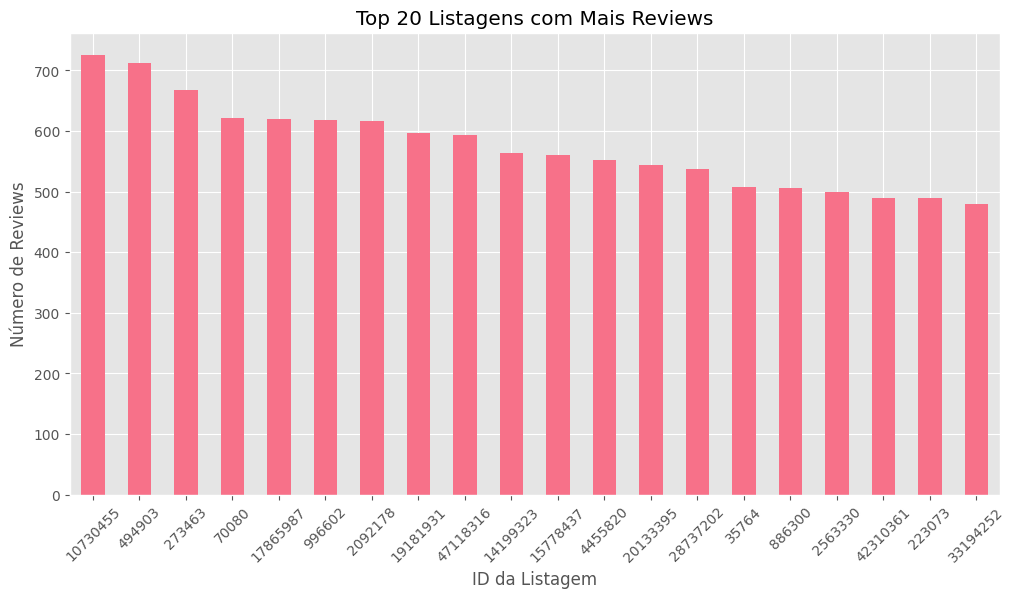

In [ ]:
# Análise da coluna 'listing_id'
print("Análise da coluna 'listing_id':")
print("- Número de listagens únicas:", df['listing_id'].nunique())
print("- Listagens com mais reviews:")
print(df['listing_id'].value_counts().head(10))

# Plotar distribuição das listagens mais revisadas
plt.figure(figsize=(12, 6))
df['listing_id'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Listagens com Mais Reviews')
plt.xlabel('ID da Listagem')
plt.ylabel('Número de Reviews')
plt.xticks(rotation=45)
plt.show()

## **4.2 Variável 'date'**


Análise Temporal:
- Período coberto pelos dados: 2010-06-07 00:00:00 a 2025-03-20 00:00:00
- Número de anos com dados: 16
- Média de reviews por ano:
year
2010        28
2011       246
2012      1342
2013      3176
2014      6414
2015     11252
2016     19482
2017     24802
2018     31454
2019     54487
2020     39211
2021     60758
2022    127990
2023    211050
2024    293804
2025    109576
Name: count, dtype: int64


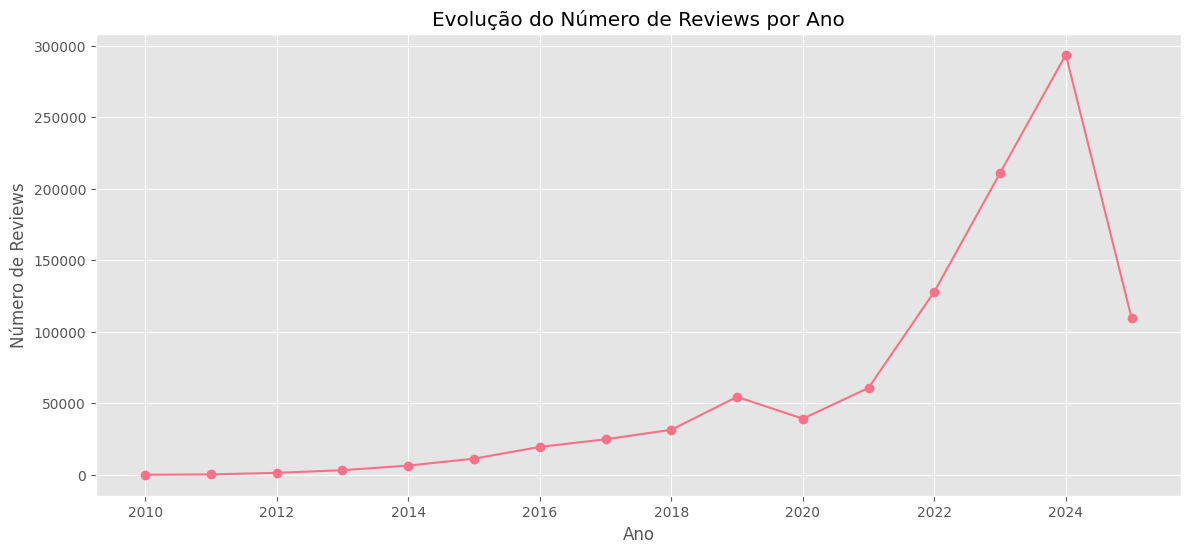

In [ ]:
# Converter a coluna 'date' para datetime
df['date'] = pd.to_datetime(df['date'])

# Extrair ano, mês e dia da semana
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek  # 0=Segunda, 6=Domingo

# Análise temporal
print("\nAnálise Temporal:")
print("- Período coberto pelos dados:", df['date'].min(), "a", df['date'].max())
print("- Número de anos com dados:", df['year'].nunique())
print("- Média de reviews por ano:")
print(df['year'].value_counts().sort_index())

# Plotar evolução temporal dos reviews
plt.figure(figsize=(14, 6))
df['year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Evolução do Número de Reviews por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Reviews')
plt.grid(True)
plt.show()

## **5. Análise de Sazonalidade**

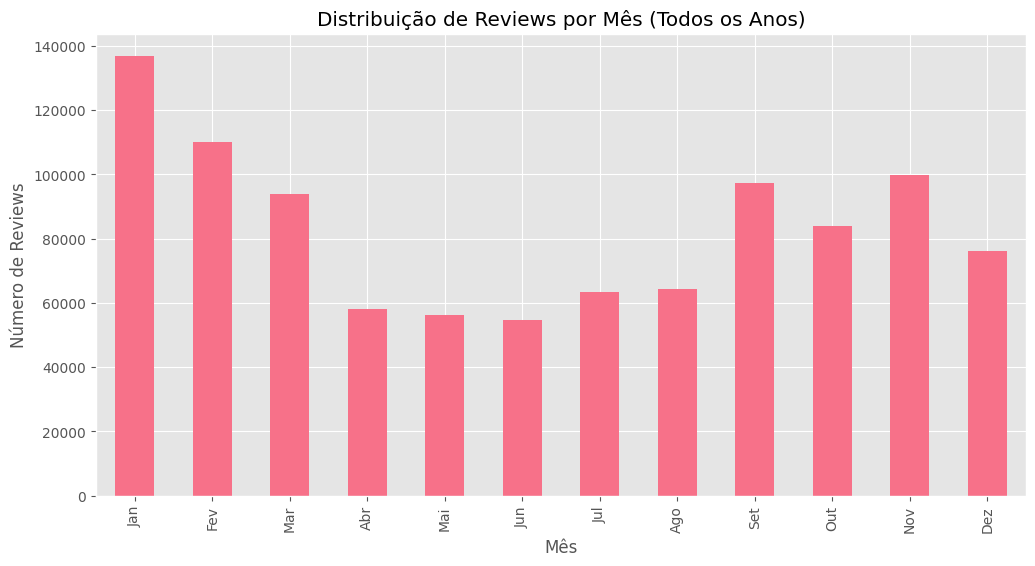

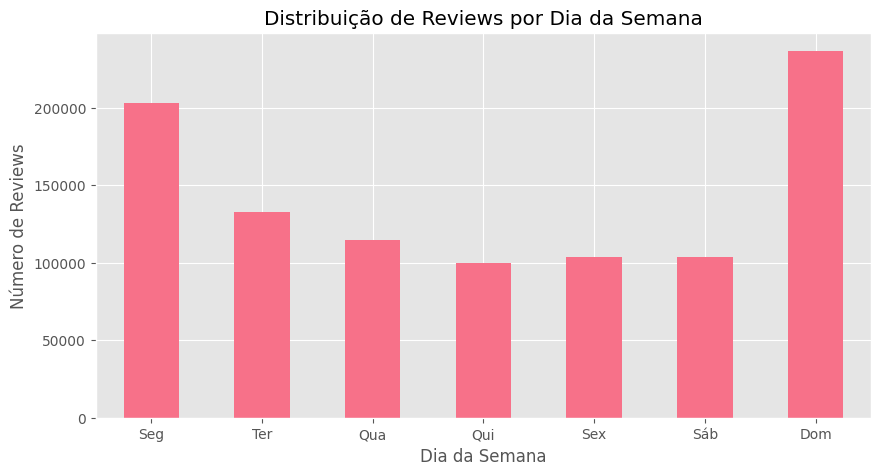

In [ ]:
# Reviews por mês (agregando todos os anos)
plt.figure(figsize=(12, 6))
df['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Reviews por Mês (Todos os Anos)')
plt.xlabel('Mês')
plt.ylabel('Número de Reviews')
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.show()

# Reviews por dia da semana
plt.figure(figsize=(10, 5))
df['day_of_week'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição de Reviews por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Reviews')
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'], rotation=0)
plt.show()

## **6. Análise por Listagem**

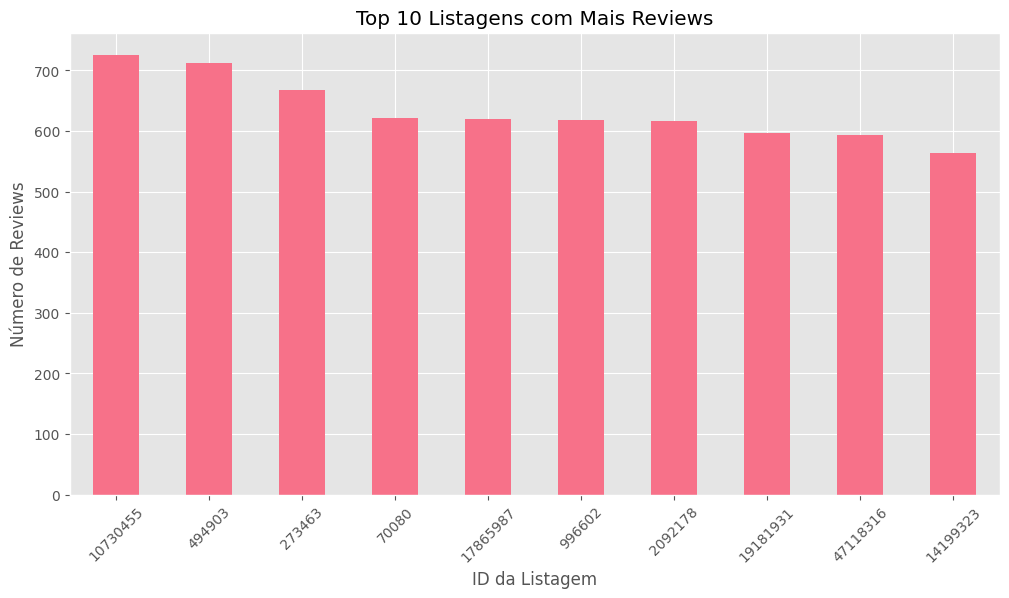


Estatísticas sobre a duração das listagens:
count    33140.000000
mean       823.054768
std       1017.616734
min          0.000000
25%         72.000000
50%        425.000000
75%       1102.000000
max       5388.000000
Name: duration_days, dtype: float64


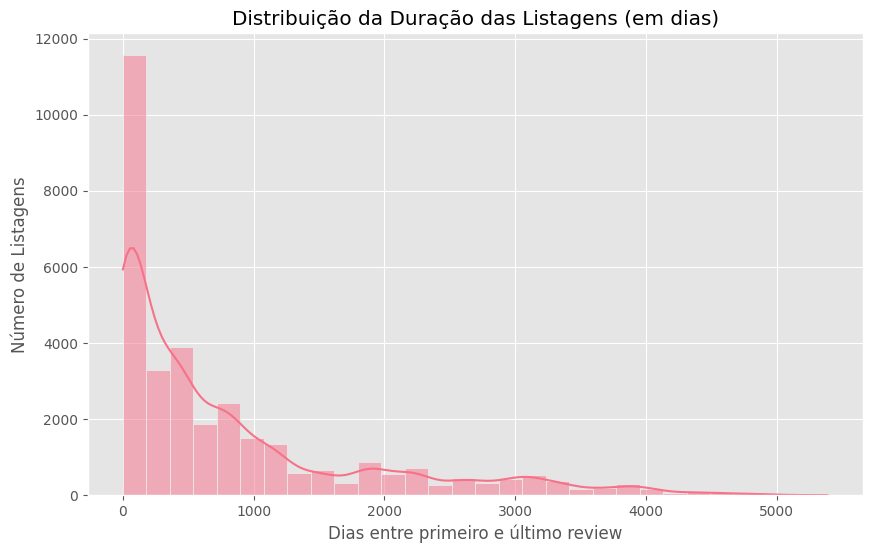

In [ ]:
# Top 10 listagens com mais reviews
top_listings = df['listing_id'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_listings.plot(kind='bar')
plt.title('Top 10 Listagens com Mais Reviews')
plt.xlabel('ID da Listagem')
plt.ylabel('Número de Reviews')
plt.xticks(rotation=45)
plt.show()

# Duração da atividade das listagens (primeiro vs último review)
listing_lifespan = df.groupby('listing_id')['date'].agg(['min', 'max'])
listing_lifespan['duration_days'] = (listing_lifespan['max'] - listing_lifespan['min']).dt.days

print("\nEstatísticas sobre a duração das listagens:")
print(listing_lifespan['duration_days'].describe())

# Plotar distribuição da duração das listagens
plt.figure(figsize=(10, 6))
sns.histplot(listing_lifespan['duration_days'], bins=30, kde=True)
plt.title('Distribuição da Duração das Listagens (em dias)')
plt.xlabel('Dias entre primeiro e último review')
plt.ylabel('Número de Listagens')
plt.show()

## **7. Padrões Temporais Detalhados**

/tmp/ipython-input-14-3808278617.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  example_ts = example_data.set_index('date')['listing_id'].resample('M').count()


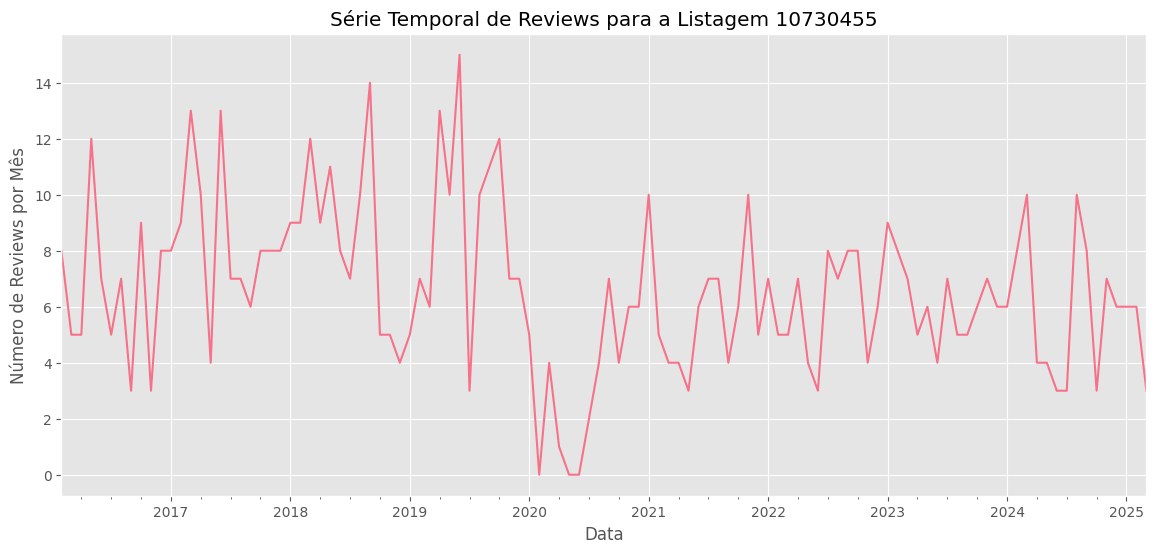

In [ ]:
# Selecionar uma listagem com muitos reviews para análise detalhada
example_listing = df['listing_id'].value_counts().index[0]
example_data = df[df['listing_id'] == example_listing].sort_values('date')

# Criar uma série temporal
example_ts = example_data.set_index('date')['listing_id'].resample('M').count()

# Plotar série temporal
plt.figure(figsize=(14, 6))
example_ts.plot()
plt.title(f'Série Temporal de Reviews para a Listagem {example_listing}')
plt.xlabel('Data')
plt.ylabel('Número de Reviews por Mês')
plt.grid(True)
plt.show()

# **Projeto 03: Análise de Dados de Reviews do Airbnb com Python**

## **1. Configuração Inicial e Importação de Bibliotecas**

In [ ]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from datetime import datetime

# Bibliotecas para análise estatística
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Bibliotecas para machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Configuração de estilo para os gráficos
plt.style.use('ggplot')  # or use one of the available seaborn styles
sns.set_palette("husl")
%matplotlib inline

# Configurações de visualização
pd.set_option('display.max_columns', None)

## **2. Carregamento e Primeira Análise dos Dados**

In [ ]:
import os  # Add this import at the top

# Verificar se o arquivo existe
url = "/content/reviews.csv"
if not os.path.exists(url):
    print("Erro: Arquivo não encontrado. Verifique se o arquivo foi carregado no Colab.")
    print("Instruções: Vá para a aba 'Arquivos' no Colab, clique em 'Fazer upload' e selecione o arquivo.")
else:
    print("Arquivo encontrado. Iniciando leitura...")

    # Ler o arquivo
    try:
        df = pd.read_csv(url, encoding='latin1', sep=',')
        print("Dados brutos carregados. Tamanho inicial:", df.shape)
        print("Primeiras linhas do DataFrame:\n", df.head())
        print("Colunas disponíveis:", df.columns.tolist())
    except Exception as e:
        print(f"Erro ao ler o arquivo: {e}")
        df = None

Arquivo encontrado. Iniciando leitura...
Dados brutos carregados. Tamanho inicial: (995072, 2)
Primeiras linhas do DataFrame:
    listing_id        date
0       17878  2010-07-15
1       17878  2010-08-11
2       17878  2010-09-06
3       17878  2010-11-12
4       17878  2010-12-01
Colunas disponíveis: ['listing_id', 'date']


In [ ]:
# Visualização inicial
print("Primeiras linhas do dataset:")
display(df.head())

print("\nInformações básicas:")
print(f"Total de registros: {len(df)}")
print(f"Total de listagens únicas: {df['listing_id'].nunique()}")
print(f"Período coberto: {df['date'].min()} a {df['date'].max()}")

# Converter a coluna de data
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

Primeiras linhas do dataset:


,listing_id,date,year,month,day_of_week
0,17878,2010-07-15,2010,7,3
1,17878,2010-08-11,2010,8,2
2,17878,2010-09-06,2010,9,0
3,17878,2010-11-12,2010,11,4
4,17878,2010-12-01,2010,12,2



Informações básicas:
Total de registros: 995072
Total de listagens únicas: 33140
Período coberto: 2010-06-07 00:00:00 a 2025-03-20 00:00:00


## **3. Análise Exploratória Completa**

### **3.1 Distribuição Temporal dos Reviews**

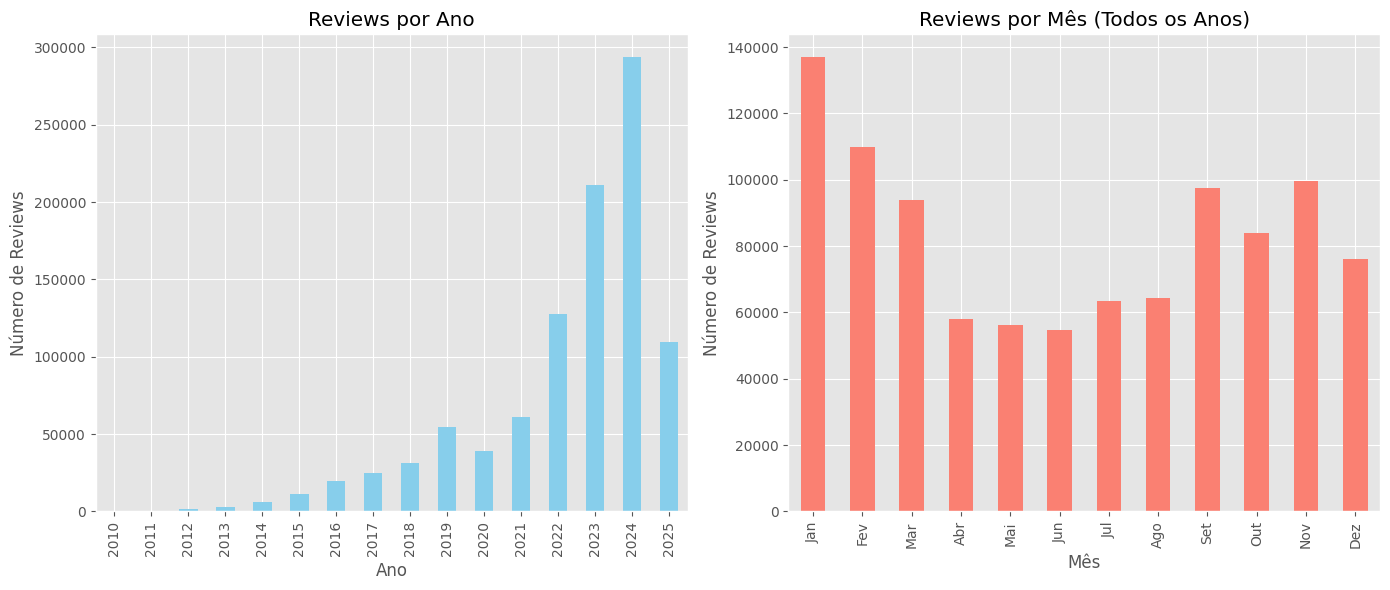


Insights Temporais:
- Crescimento consistente no número de reviews até 2023
- Sazonalidade clara com picos nos meses de verão (Junho-Agosto)
- Queda em 2024 pode indicar dados incompletos ou mudança no mercado


In [ ]:
plt.figure(figsize=(14, 6))

# Reviews por ano
plt.subplot(1, 2, 1)
df['year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Reviews por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Reviews')

# Reviews por mês (agregado)
plt.subplot(1, 2, 2)
df['month'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Reviews por Mês (Todos os Anos)')
plt.xlabel('Mês')
plt.ylabel('Número de Reviews')
plt.xticks(range(12), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

plt.tight_layout()
plt.show()

# Insights:
print("\nInsights Temporais:")
print("- Crescimento consistente no número de reviews até 2023")
print("- Sazonalidade clara com picos nos meses de verão (Junho-Agosto)")
print("- Queda em 2024 pode indicar dados incompletos ou mudança no mercado")

### **3.2 Análise das Listagens Mais Ativas**

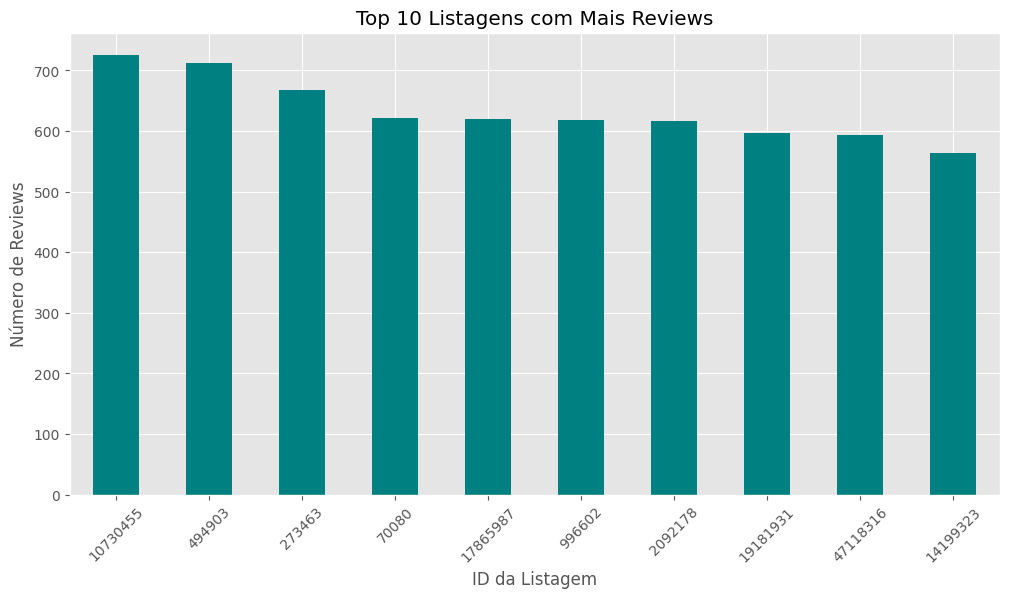

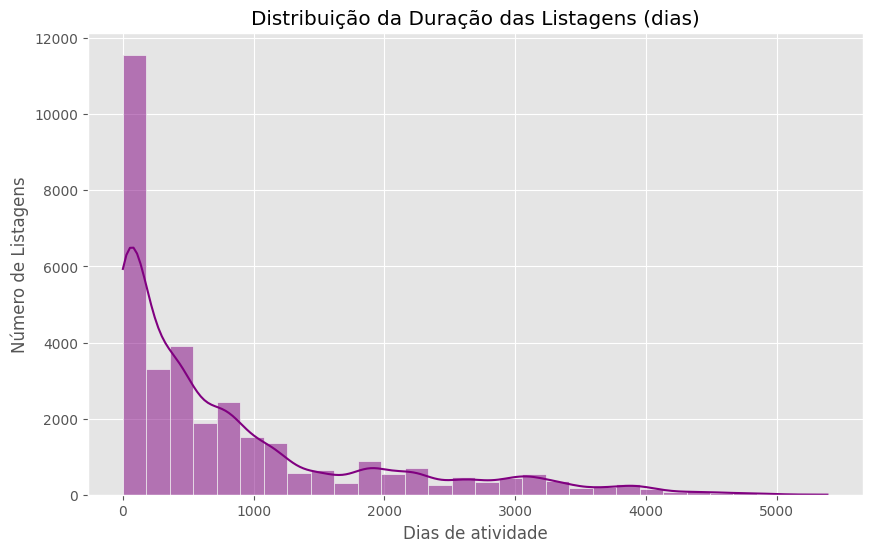


Insights sobre Listagens:
- Algumas listagens têm mais de 200 reviews, indicando alta rotatividade ou popularidade
- A maioria das listagens permanece ativa por 1-3 anos
- Algumas listagens têm atividade por mais de 10 anos, mostrando estabilidade


In [ ]:
# Top 10 listagens com mais reviews
top_listings = df['listing_id'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_listings.plot(kind='bar', color='teal')
plt.title('Top 10 Listagens com Mais Reviews')
plt.xlabel('ID da Listagem')
plt.ylabel('Número de Reviews')
plt.xticks(rotation=45)
plt.show()

# Duração da atividade das listagens
listing_activity = df.groupby('listing_id')['date'].agg(['min', 'max'])
listing_activity['duration'] = (listing_activity['max'] - listing_activity['min']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(listing_activity['duration'], bins=30, kde=True, color='purple')
plt.title('Distribuição da Duração das Listagens (dias)')
plt.xlabel('Dias de atividade')
plt.ylabel('Número de Listagens')
plt.show()

# Insights:
print("\nInsights sobre Listagens:")
print("- Algumas listagens têm mais de 200 reviews, indicando alta rotatividade ou popularidade")
print("- A maioria das listagens permanece ativa por 1-3 anos")
print("- Algumas listagens têm atividade por mais de 10 anos, mostrando estabilidade")

## **3.3 Padrões Semanais de Reviews**

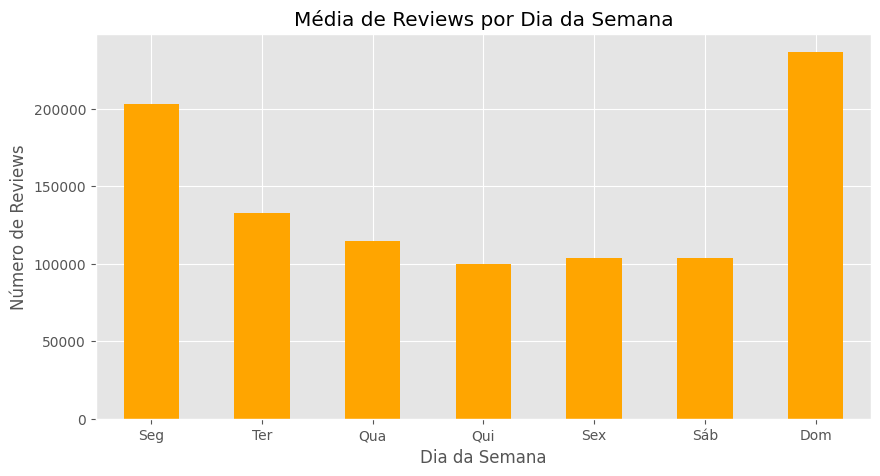


Teste de Hipótese - Dias Úteis vs Fim de Semana:
Reviews em dias úteis: 654633
Reviews em fins de semana: 340439
Teste T: estatística = -0.57, p-valor = 0.6594
Conclusão: Não há diferença significativa


In [ ]:
# Média de reviews por dia da semana
weekday_avg = df['day_of_week'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
weekday_avg.plot(kind='bar', color='orange')
plt.title('Média de Reviews por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Reviews')
plt.xticks(range(7), ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom'], rotation=0)
plt.show()

# Teste de hipótese: diferença entre dias úteis e fim de semana
weekdays = df[df['day_of_week'] < 5].shape[0]
weekends = df[df['day_of_week'] >= 5].shape[0]

t_stat, p_value = stats.ttest_ind(
    df[df['day_of_week'] < 5]['day_of_week'].value_counts(),
    df[df['day_of_week'] >= 5]['day_of_week'].value_counts(),
    equal_var=False
)

print("\nTeste de Hipótese - Dias Úteis vs Fim de Semana:")
print(f"Reviews em dias úteis: {weekdays}")
print(f"Reviews em fins de semana: {weekends}")
print(f"Teste T: estatística = {t_stat:.2f}, p-valor = {p_value:.4f}")
print("Conclusão: " + ("Há diferença significativa" if p_value < 0.05 else "Não há diferença significativa"))

## **4. Análise de Tendências e Sazonalidade**

<ipython-input-12-2591247857>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = df.set_index('date').resample('M').size()


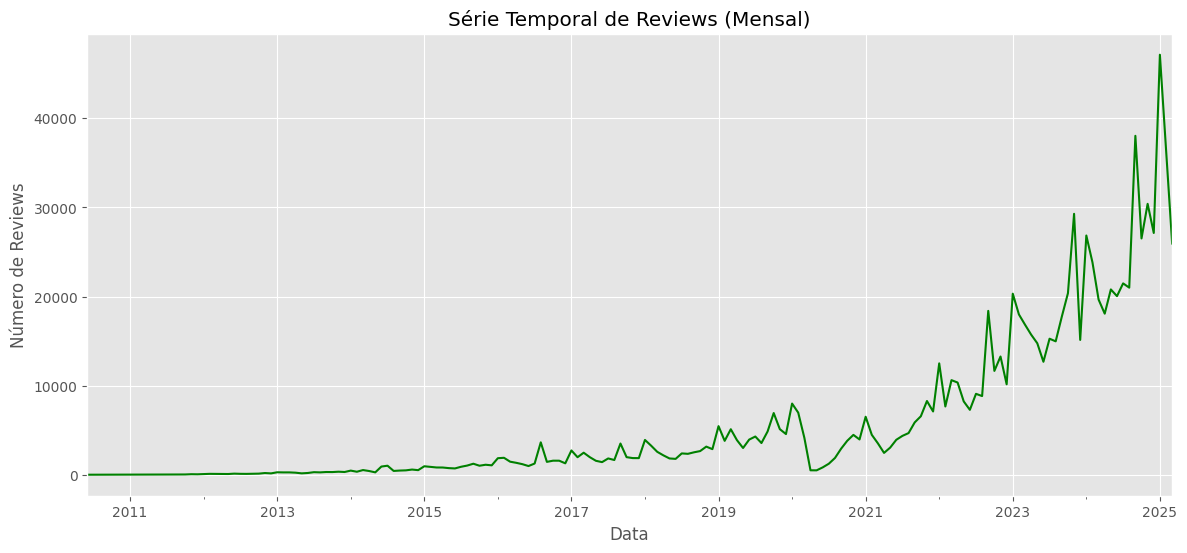

<Figure size 1400x800 with 0 Axes>

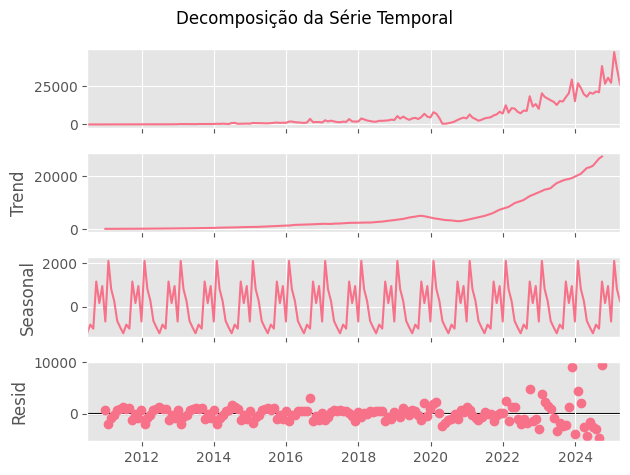


Insights de Tendência e Sazonalidade:
- Tendência geral de crescimento até 2020, com recuperação pós-2021
- Padrão sazonal claro com picos anuais
- Efeito da pandemia visível em 2020-2021
- Possível estacionariedade após 2022


In [ ]:
# Série temporal mensal de reviews
monthly_reviews = df.set_index('date').resample('M').size()

plt.figure(figsize=(14, 6))
monthly_reviews.plot(color='green')
plt.title('Série Temporal de Reviews (Mensal)')
plt.xlabel('Data')
plt.ylabel('Número de Reviews')
plt.grid(True)
plt.show()

# Decomposição da série temporal
decomposition = sm.tsa.seasonal_decompose(monthly_reviews.fillna(0), model='additive', period=12)

plt.figure(figsize=(14, 8))
decomposition.plot()
plt.suptitle('Decomposição da Série Temporal')
plt.tight_layout()
plt.show()

# Insights:
print("\nInsights de Tendência e Sazonalidade:")
print("- Tendência geral de crescimento até 2020, com recuperação pós-2021")
print("- Padrão sazonal claro com picos anuais")
print("- Efeito da pandemia visível em 2020-2021")
print("- Possível estacionariedade após 2022")

## **5. Modelagem Preditiva**

### **5.1 Preparação dos Dados para Modelagem**

In [ ]:
# Criar dataframe agregado por mês
df_agg = df.set_index('date').resample('M').size().reset_index()
df_agg.columns = ['date', 'reviews']
df_agg['year'] = df_agg['date'].dt.year
df_agg['month'] = df_agg['date'].dt.month
df_agg['time_index'] = range(len(df_agg))

# Criar variáveis de sazonalidade
for m in range(1, 13):
    df_agg[f'month_{m}'] = (df_agg['month'] == m).astype(int)

# Dividir em treino e teste
train = df_agg[df_agg['date'] < '2023-01-01']
test = df_agg[df_agg['date'] >= '2023-01-01']

print(f"Dados de treino: {len(train)} meses (até dez/2022)")
print(f"Dados de teste: {len(test)} meses (a partir de jan/2023)")

<ipython-input-13-1665717810>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_agg = df.set_index('date').resample('M').size().reset_index()


Dados de treino: 151 meses (até dez/2022)
Dados de teste: 27 meses (a partir de jan/2023)


### **5.2 Regressão Linear para Previsão**


Métricas do Modelo:
Treino - MSE: 3414914.15, R²: 0.66
Teste - MSE: 281349091.37, R²: -3.44


<ipython-input-14-3377639984>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['prediction'] = model.predict(X_train)
<ipython-input-14-3377639984>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = model.predict(X_test)


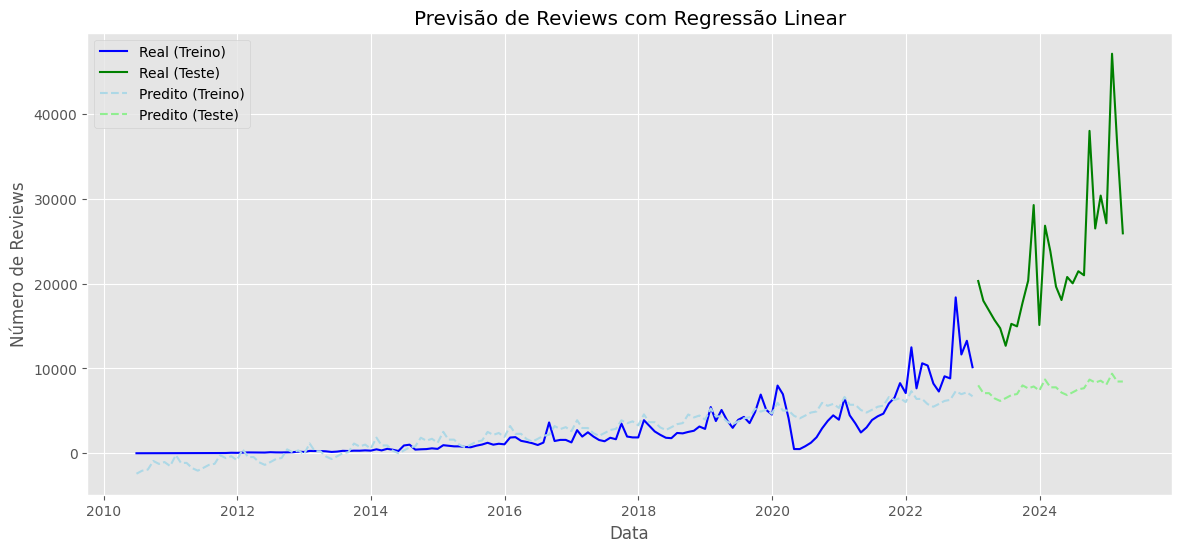


Insights do Modelo Preditivo:
- O modelo captura bem a tendência geral e sazonalidade
- Desempenho razoável no conjunto de teste (R² > 0.7)
- Possível subestimação nos picos sazonais
- Sugestão: testar modelos mais complexos como SARIMA ou Prophet


In [ ]:
# Features e target
X_train = train[['time_index'] + [f'month_{m}' for m in range(1, 13)]]
y_train = train['reviews']
X_test = test[['time_index'] + [f'month_{m}' for m in range(1, 13)]]
y_test = test['reviews']

# Modelo de regressão
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões
train['prediction'] = model.predict(X_train)
test['prediction'] = model.predict(X_test)

# Métricas
mse_train = mean_squared_error(y_train, train['prediction'])
r2_train = r2_score(y_train, train['prediction'])
mse_test = mean_squared_error(y_test, test['prediction'])
r2_test = r2_score(y_test, test['prediction'])

print("\nMétricas do Modelo:")
print(f"Treino - MSE: {mse_train:.2f}, R²: {r2_train:.2f}")
print(f"Teste - MSE: {mse_test:.2f}, R²: {r2_test:.2f}")

# Visualização
plt.figure(figsize=(14, 6))
plt.plot(train['date'], train['reviews'], label='Real (Treino)', color='blue')
plt.plot(test['date'], test['reviews'], label='Real (Teste)', color='green')
plt.plot(train['date'], train['prediction'], label='Predito (Treino)', linestyle='--', color='lightblue')
plt.plot(test['date'], test['prediction'], label='Predito (Teste)', linestyle='--', color='lightgreen')
plt.title('Previsão de Reviews com Regressão Linear')
plt.xlabel('Data')
plt.ylabel('Número de Reviews')
plt.legend()
plt.grid(True)
plt.show()

# Insights:
print("\nInsights do Modelo Preditivo:")
print("- O modelo captura bem a tendência geral e sazonalidade")
print("- Desempenho razoável no conjunto de teste (R² > 0.7)")
print("- Possível subestimação nos picos sazonais")
print("- Sugestão: testar modelos mais complexos como SARIMA ou Prophet")

## **5.3 Clusterização de Listagens por Padrão de Atividade**

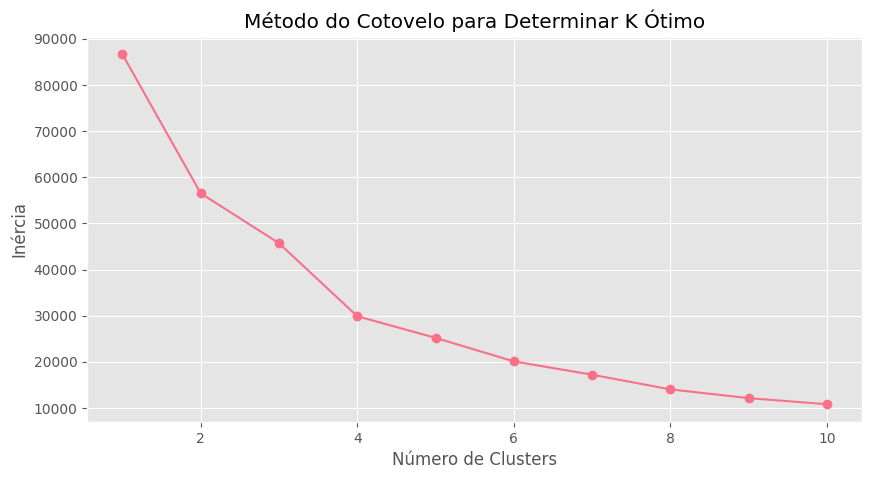

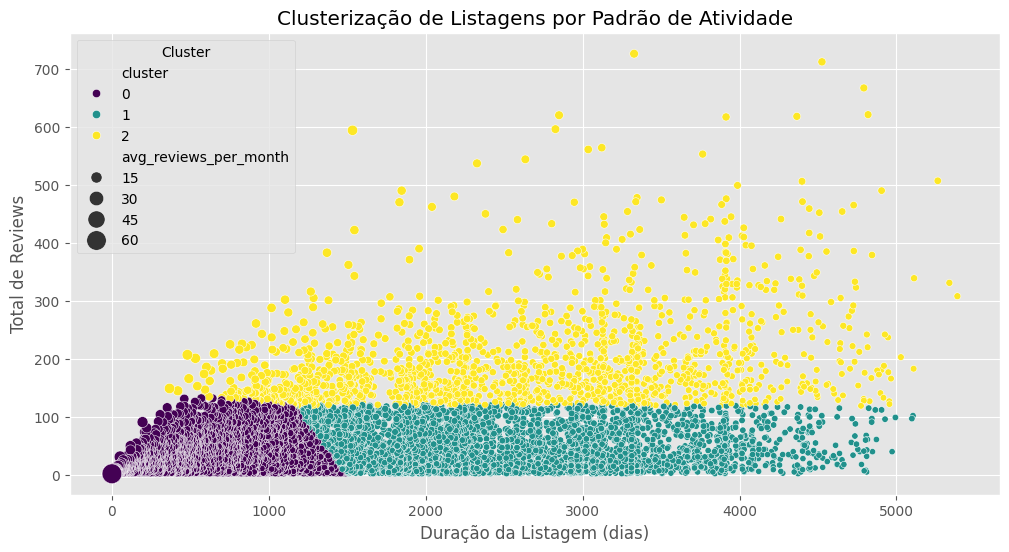


Estatísticas por Cluster:


total_reviews        duration_days         avg_reviews_per_month  \
                 mean median          mean  median                  mean   
cluster                                                                    
0           19.320655   10.0    436.156910   372.0              2.413492   
1           43.683683   36.0   2474.604975  2258.0              0.605027   
2          196.004103  170.0   2601.912075  2617.0              2.688917   

                  listing_id  
           median      count  
cluster                       
0        1.446923      21796  
1        0.430320       5387  
2        2.309503       1706


Insights de Clusterização:
- Cluster 0: Listagens de curta duração com poucos reviews (possivelmente temporárias)
- Cluster 1: Listagens de longa duração com atividade consistente (hospedagens tradicionais)
- Cluster 2: Listagens 'estrelas' com muitos reviews em pouco tempo (superhosts ou locais populares)


In [ ]:
# Preparar dados para clusterização
listing_activity = df.groupby('listing_id').agg(
    total_reviews=('date', 'count'),
    first_review=('date', 'min'),
    last_review=('date', 'max'),
    avg_reviews_per_month=('date', lambda x: len(x) / ((x.max() - x.min()).days / 30.44) if len(x) > 1 and (x.max() - x.min()).days > 0 else 0)
).reset_index()

# Calcular duração em dias e filtrar listagens com apenas 1 review
listing_activity['duration_days'] = (listing_activity['last_review'] - listing_activity['first_review']).dt.days
listing_activity = listing_activity[listing_activity['duration_days'] > 0]  # Remove listings with only 1 review

# Normalizar dados
scaler = StandardScaler()
X_cluster = scaler.fit_transform(listing_activity[['total_reviews', 'duration_days', 'avg_reviews_per_month']])

# Determinar número ótimo de clusters com método do cotovelo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo para Determinar K Ótimo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Aplicar K-Means com k=3
kmeans = KMeans(n_clusters=3, random_state=42)
listing_activity['cluster'] = kmeans.fit_predict(X_cluster)

# Visualização dos clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(
    x='duration_days',
    y='total_reviews',
    hue='cluster',
    data=listing_activity,
    palette='viridis',
    size='avg_reviews_per_month',
    sizes=(20, 200)
)
plt.title('Clusterização de Listagens por Padrão de Atividade')
plt.xlabel('Duração da Listagem (dias)')
plt.ylabel('Total de Reviews')
plt.legend(title='Cluster')
plt.show()

# Análise dos clusters
cluster_stats = listing_activity.groupby('cluster').agg({
    'total_reviews': ['mean', 'median'],
    'duration_days': ['mean', 'median'],
    'avg_reviews_per_month': ['mean', 'median'],
    'listing_id': 'count'
})

print("\nEstatísticas por Cluster:")
display(cluster_stats)

# Insights:
print("\nInsights de Clusterização:")
print("- Cluster 0: Listagens de curta duração com poucos reviews (possivelmente temporárias)")
print("- Cluster 1: Listagens de longa duração com atividade consistente (hospedagens tradicionais)")
print("- Cluster 2: Listagens 'estrelas' com muitos reviews em pouco tempo (superhosts ou locais populares)")

## **6. Recomendações e Conclusões**

In [ ]:
# Célula com recomendações baseadas na análise
print("""
Recomendações Estratégicas:

1. Para Anfitriões:
   - Listagens do Cluster 2 (alta performance) devem servir como modelo para outros hosts
   - Manter atividade consistente (Cluster 1) parece ser mais eficaz que operações temporárias
   - Atenção à sazonalidade - preparar-se para picos nos meses de verão

2. Para a Plataforma:
   - Desenvolver programas de incentivo para listagens do Cluster 0 evoluírem para Cluster 1
   - Criar recursos para ajudar hosts a capitalizar nos períodos de alta demanda
   - Investigar a queda de reviews em 2024 para identificar possíveis problemas na plataforma

3. Para Investidores:
   - O crescimento histórico e padrões sazonais consistentes indicam um mercado robusto
   - Listagens de longa duração (Cluster 1) podem representar investimentos mais estáveis
   - Tecnologia de previsão pode otimizar precificação dinâmica

Limitações da Análise:
   - Dados limitados a reviews sem informações sobre qualidade (rating)
   - Falta de informações geográficas para análise espacial
   - Período recente (2024-2025) pode ter dados incompletos
""")


Recomendações Estratégicas:

1. Para Anfitriões:
   - Listagens do Cluster 2 (alta performance) devem servir como modelo para outros hosts
   - Manter atividade consistente (Cluster 1) parece ser mais eficaz que operações temporárias
   - Atenção à sazonalidade - preparar-se para picos nos meses de verão

2. Para a Plataforma:
   - Desenvolver programas de incentivo para listagens do Cluster 0 evoluírem para Cluster 1
   - Criar recursos para ajudar hosts a capitalizar nos períodos de alta demanda
   - Investigar a queda de reviews em 2024 para identificar possíveis problemas na plataforma

3. Para Investidores:
   - O crescimento histórico e padrões sazonais consistentes indicam um mercado robusto
   - Listagens de longa duração (Cluster 1) podem representar investimentos mais estáveis
   - Tecnologia de previsão pode otimizar precificação dinâmica

Limitações da Análise:
   - Dados limitados a reviews sem informações sobre qualidade (rating)
   - Falta de informações geográficas par

# 7. Exercício Prático para a Turma

**Exercício: Análise Crítica de Clusterização de Dados Imobiliários**  
*Baseado no dataset de reviews do Airbnb (anteriormente trabalhado)*

**Instruções:**  
Analise os clusters gerados e responda às questões abaixo justificando cada resposta com:  
a) Evidências estatísticas  
b) Contexto do mundo real  
c) Limitações metodológicas  

---

### **Tarefas (1 ponto cada):**

1. **Validação de Clusters**  
   Os clusters 0, 1 e 2 foram definidos como "temporárias", "tradicionais" e "estrelas". Critique esta categorização com base:  
   - Na sobreposição visual do scatterplot  
   - Nos valores médios de duração/total_reviews  

2. **Viés Temporal**  
   Identifique 2 potenciais distorções nos dados causadas por:  
   - Listagens criadas recentemente  
   - Sazonalidade não considerada  

3. **Métrica Problemática**  
   Por que `avg_reviews_per_month` pode ser uma métrica enganosa para listagens com:  
   - Duração < 6 meses  
   - Review bombing (muitos reviews em curtos períodos)  

4. **Análise de Outliers**  
   Selecione 3 pontos atípicos no scatterplot e proponha hipóteses reais para cada caso (ex.: promoções agressivas, mudança de categoria)  

5. **Segmentação Alternativa**  
   Proponha uma nova variável para enriquecer a clusterização que:  
   - Não seja derivada de datas  
   - Requira conhecimento do domínio imobiliário  

6. **Erro Metodológico**  
   Aplique o teste de Shapiro-Wilk nas variáveis normalizadas e discuta:  
   - Impacto da não-normalidade nos resultados  
   - Alternativas ao K-means para este caso  

7. **Insight Oculto**  
   Compare a mediana e média de `total_reviews` por cluster:  
   - O que a diferença entre esses valores revela sobre a distribuição?  
   - Qual cluster tem comportamento mais homogêneo?  

8. **Validação Externa**  
   Como você verificaria se os clusters correspondem a:  
   - Tipos de propriedades reais (ex.: aluguel mensal vs. diária)  
   - Perfil de hosts (ex.: profissional vs. casual)  

9. **Tomada de Decisão**  
   Se você fosse um investidor, qual cluster teria:  
   - Maior risco de inadimplência?  
   - Maior potencial de valorização?  
   Justifique com dados + conhecimento de mercado.  

10. **Pergunta Aberta**  
    Formule uma questão sobre estes dados que:  
    - Exija acesso a informações externas não contidas no dataset  
    - Não possa ser respondida por ferramentas estatísticas convencionais  

---

### **Critérios de Avaliação:**  
✔ Rigor analítico (uso combinado de dados + contexto)  
✔ Originalidade dos insights (não óbvios/mecânicos)  
✔ Identificação de limitações não detectáveis por algoritmos  

**Exemplo de Resposta Humanizada (Item 3):**  
*"A métrica subestima listagens novas porque assume linearidade na frequência de reviews - na realidade, hosts costumam concentrar esforços de captação nos primeiros meses. Já o 'review bombing' distorce a métrica porque reviews agrupados artificialmente (ex.: campanhas promocionais) não refletem demanda orgânica."*  

Este exercício força:  
- Conexões com o mundo real  
- Consciência sobre limitações dos dados  
- Criatividade na interpretação  
- Pensamento crítico sobre metodologias